In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file

In [2]:
#读取数据集
data=load_svmlight_file('a9a')
X_train=data[0].todense()
y_train=data[1]
data=load_svmlight_file('a9a.t')
X_validation=data[0].todense()
y_validation=data[1]

In [3]:
#对数据的格式进行预处理
X_train=X_train.T
x_0=np.ones(X_train.shape[1])
X_train=np.row_stack((X_train,x_0))
y_train=np.mat(y_train)
X_validation=X_validation.T
a=np.zeros(X_validation.shape[1])
x_0=np.ones(X_validation.shape[1])
X_validation=np.row_stack((X_validation,a))
X_validation=np.row_stack((X_validation,x_0))
y_validation=np.mat(y_validation)

In [4]:
def Loss(w,x,y):
    loss=0
    for i in range(x.shape[1]):
        if (1-y[0,i]*(w.T*x[:,i]))>0:
            loss+=1-y[0,i]*(w.T*x[:,i])
    losl=loss/float(y.shape[1])
    loss+=(w.T*w)/2.0
    return loss[0,0]

In [5]:
def SGD(w_current,x,y,learning_rate):
    gradient=np.mat(np.zeros(w_current.shape))
    for i in [np.random.randint(0,x.shape[1]) for j in range(20)]:
        if (1-y[0,i]*(w_current.T*x[:,i]))>0:
            gradient+=-y[0,i]*x[:,i]
    gradient+=w_current
    new_w=w_current-learning_rate*gradient
    return new_w

In [6]:
def SGD_NAG(w_current,momentum,x,y,learning_rate):
    gradient=np.mat(np.zeros(w_current.shape))
    for i in [np.random.randint(0,x.shape[1]) for j in range(20)]:
        if (1-y[0,i]*(w_current.T*x[:,i]))>0:
            gradient+=-y[0,i]*x[:,i]
    gradient+=w_current-momentum
    momentum=0.9*momentum+learning_rate*gradient
    
    new_w=w_current-momentum
    return new_w,momentum

In [7]:
def SGD_RMSProp(w_current,g,x,y,learning_rate):
    gradient=np.mat(np.zeros(w_current.shape))
    for i in [np.random.randint(0,x.shape[1]) for j in range(20)]:
        if (1-y[0,i]*(w_current.T*x[:,i]))>0:
            gradient+=-y[0,i]*x[:,i]
    gradient+=w_current
    g=0.9*g+0.1*(gradient.T*gradient)[0,0]
    new_w=w_current-(learning_rate/(np.sqrt(g+1e-8)))*gradient
    return new_w,g

In [8]:
def SGD_AdaDelta(w_current,g,delta,x,y):
    gradient=np.mat(np.zeros(w_current.shape))
    for i in [np.random.randint(0,x.shape[1]) for j in range(20)]:
        if (1-y[0,i]*(w_current.T*x[:,i]))>0:
            gradient+=-y[0,i]*x[:,i]
    gradient+=w_current
    g=0.95*g+0.05*(gradient.T*gradient)[0,0]
    
    step_length=(np.sqrt(delta+1e-8)/np.sqrt(g+1e-8))*gradient
    new_w=w_current-step_length
    delta=0.95*delta+0.05*(step_length.T*step_length)[0,0]
    return new_w,g,delta

In [9]:
def SGD_Adam(w_current,m,g,x,y,learning_rate,iter_num):
    gradient=np.mat(np.zeros(w_current.shape))
    for i in [np.random.randint(0,x.shape[1]) for j in range(20)]:
        if (1-y[0,i]*(w_current.T*x[:,i]))>0:
            gradient+=-y[0,i]*x[:,i]
    gradient+=w_current
    m=0.9*m+0.1*gradient
    g=0.999*g+0.001*gradient.T*gradient
    alpha=learning_rate*np.sqrt(1-0.999**iter_num)/(1-0.9**iter_num)
    new_w=w_current-alpha*m/np.sqrt(g+1e-8)
    return new_w,m,g

In [10]:
#SGD
#定义参数
W=np.mat(np.zeros(X_train.shape[0])).T
iter_num=1000
learning_rate=0.001

loss_validation=[]
loss_validation.append(Loss(W,X_validation,y_validation))
for i in range(iter_num):
    W=SGD(W,X_train,y_train,learning_rate)
    if (i+1)%10==0:
        loss_validation.append(Loss(W,X_validation,y_validation))

In [11]:
#NAG
#定义参数
W=np.mat(np.zeros(X_train.shape[0])).T
momentum=np.mat(np.zeros(X_train.shape[0])).T
iter_num=1000
learning_rate=0.001

loss_NAG_validation=[]
loss_NAG_validation.append(Loss(W,X_validation,y_validation))
for i in range(iter_num):
    W,momentum=SGD_NAG(W,momentum,X_train,y_train,learning_rate)
    if (i+1)%10==0:
        loss_NAG_validation.append(Loss(W,X_validation,y_validation))


In [12]:
#RMSProp
#定义参数
W=np.mat(np.zeros(X_train.shape[0])).T
g=0
iter_num=1000
learning_rate=0.1

loss_RMSProp_validation=[]
loss_RMSProp_validation.append(Loss(W,X_validation,y_validation))
for i in range(iter_num):
    W,g=SGD_RMSProp(W,g,X_train,y_train,learning_rate)
    if (i+1)%10==0:
        loss_RMSProp_validation.append(Loss(W,X_validation,y_validation))

In [13]:
#AdaDelta
#定义参数
W=np.mat(np.zeros(X_train.shape[0])).T
g=0.0
delta=0.003
iter_num=1000
loss_AdaDelta_validation=[]
loss_AdaDelta_validation.append(Loss(W,X_validation,y_validation))
for i in range(iter_num):
    W,g,delta=SGD_AdaDelta(W,g,delta,X_train,y_train)
    if (i+1)%10==0:
        loss_AdaDelta_validation.append(Loss(W,X_validation,y_validation))

In [14]:
#Adam
#定义参数
W=np.mat(np.zeros(X_train.shape[0])).T
g=0.0
learning_rate=0.1
momentum=np.mat(np.zeros(W.shape))
iter_num=1000

loss_Adam_validation=[]
loss_Adam_validation.append(Loss(W,X_validation,y_validation))
for i in range(iter_num):
    W,m,g=SGD_Adam(W,momentum,g,X_train,y_train,learning_rate,i+1)
    if (i+1)%10==0:
        loss_Adam_validation.append(Loss(W,X_validation,y_validation))

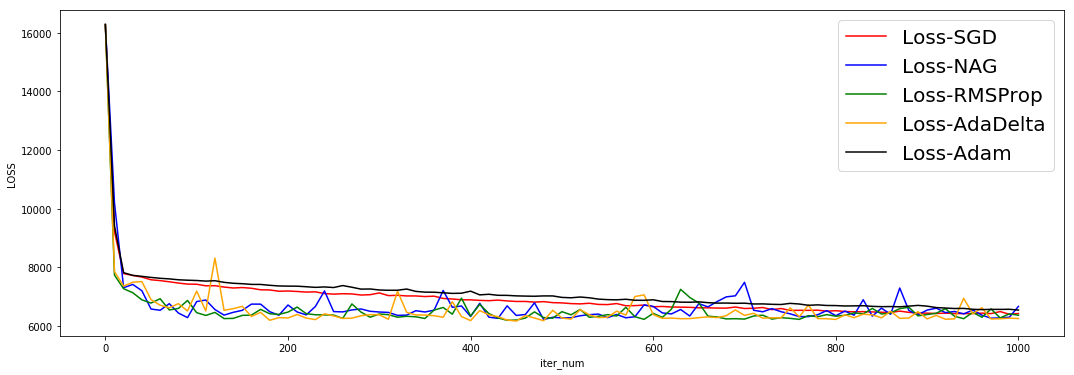

In [19]:
#画图
plt.figure(figsize=(18,6))
plt.plot([i*10 for i in range(101)],loss_validation,color='red',label='Loss-SGD')
plt.plot([i*10 for i in range(101)],loss_NAG_validation,color='blue',label='Loss-NAG')
plt.plot([i*10 for i in range(101)],loss_RMSProp_validation,color='green',label='Loss-RMSProp')
plt.plot([i*10 for i in range(101)],loss_AdaDelta_validation,color='orange',label='Loss-AdaDelta')
plt.plot([i*10 for i in range(101)],loss_Adam_validation,color='black',label='Loss-Adam')
plt.xlabel('iter_num')
plt.ylabel('LOSS')
plt.legend(fontsize=20)
plt.show()